In [1]:
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [2]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [3]:
sce_0 = sce[,sce$day == 'day0']
sce_0

class: SingleCellExperiment 
dim: 11231 9661 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(9661): 21672_1#101 21672_1#102 ... 24475_8#96 24475_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [154]:
unique(sce_0[,sce_0$donor_short_id == 'guyj_2']$experiment)

[1] "expt_23" "expt_24"

In [4]:
donors = unique(sce_0$donor_long_id)
donors

[1] "HPSI0114i-zapk_3" "HPSI0214i-wibj_2" "HPSI1013i-jogf_2"
  [4] "HPSI0214i-pelm_3" "HPSI0114i-vass_1" "HPSI0214i-heth_1"
  [7] "HPSI1014i-toss_3" "HPSI0614i-paab_4" "HPSI0414i-oaqd_3"
 [10] "HPSI1013i-sita_1" "HPSI0614i-zoio_2" "HPSI0914i-kajh_3"
 [13] "HPSI0714i-fasu_2" "HPSI0414i-tout_1" "HPSI0714i-iudw_4"
 [16] "HPSI0514i-tavh_2" "HPSI0514i-pulk_1" "HPSI0215i-fawm_2"
 [19] "HPSI0714i-oebj_1" "HPSI0714i-oojs_1" "HPSI0514i-eoxi_6"
 [22] "HPSI0414i-seru_1" "HPSI0614i-guyj_2" "HPSI1014i-qayj_3"
 [25] "HPSI0414i-walu_1" "HPSI1014i-babz_3" "HPSI0114i-iisa_1"
 [28] "HPSI0414i-oikd_2" "HPSI1014i-quls_2" "HPSI0514i-sohd_3"
 [31] "HPSI0514i-letw_1" "HPSI0215i-oilg_3" "HPSI0514i-rutc_2"
 [34] "HPSI0115i-vazt_1" "HPSI0614i-oicx_6" "HPSI1113i-wahn_1"
 [37] "HPSI1014i-sehl_6" "HPSI0914i-suop_5" "HPSI0715i-aowh_2"
 [40] "HPSI0314i-cuhk_2" "HPSI0613i-hegp_3" "HPSI0713i-cicb_2"
 [43] "HPSI0614i-lepk_1" "HPSI0713i-veku_2" "HPSI0613i-ueah_1"
 [46] "HPSI0414i-naju_1" "HPSI0913i-lise_3" "HPSI0214i-eiwy_1"
 [49] "HPSI0514i-puie_5" "HPSI0115i-qoog_4" "HPSI0914i-zerv_8"
 [52] "HPSI0114i-kolf_2" "HPSI0514i-uenn_3" "HPSI0914i-iezw_2"
 [55] "HPSI0114i-wegi_1" "HPSI0314i-sojd_3" "HPSI1213i-tolg_6"
 [58] "HPSI0214i-rayr_1" "HPSI0314i-qaqx_1" "HPSI1013i-yemz_1"
 [61] "HPSI1013i-wuye_2" "HPSI0114i-joxm_1" "HPSI0214i-kucg_2"
 [64] "HPSI0114i-iisa_3" "HPSI0114i-bezi_1" "HPSI1014i-kefb_1"
 [67] "HPSI1014i-nosn_6" "HPSI1213i-pahc_4" "HPSI0414i-xojn_3"
 [70] "HPSI0314i-hoik_1" "HPSI0114i-eipl_1" "HPSI0215i-yoch_6"
 [73] "HPSI1113i-hayt_1" "HPSI1014i-eesb_1" "HPSI1013i-kuxp_1"
 [76] "HPSI0514i-yelp_3" "HPSI0614i-qunz_3" "HPSI0115i-aoxv_3"
 [79] "HPSI0115i-melw_2" "HPSI0714i-pipw_5" "HPSI1014i-juuy_2"
 [82] "HPSI0914i-jejf_2" "HPSI0914i-qehq_3" "HPSI0614i-uilk_3"
 [85] "HPSI0514i-toco_5" "HPSI1113i-hajc_1" "HPSI0514i-kuco_1"
 [88] "HPSI0115i-hecn_3" "HPSI0614i-liqa_1" "HPSI0514i-tert_1"
 [91] "HPSI0614i-ciwj_2" "HPSI0214i-poih_4" "HPSI0115i-iiyk_4"
 [94] "HPSI0614i-miaj_6" "HPSI0914i-laey_4" "HPSI0715i-meue_4"
 [97] "HPSI1014i-vils_1" "HPSI0714i-keui_1" "HPSI0514i-naah_2"
[100] "HPSI0513i-oibg_1" "HPSI0713i-nocf_2" "HPSI0813i-guss_1"
[103] "HPSI0414i-mita_2" "HPSI0214i-datg_2" "HPSI1113i-qorq_2"
[106] "HPSI0214i-feec_2" "HPSI0413i-nudd_1" "HPSI0814i-bokz_5"
[109] "HPSI0314i-wigw_2" "HPSI1013i-zagm_1" "HPSI0513i-fejf_2"
[112] "HPSI0714i-nufh_3"

In [5]:
kinship_filename = '/hps/nobackup/hipsci/scratch/genotypes/imputed/2017-03-27/Full_Filtered_SNPs_Plink-F/hipsci.wec.gtarray.HumanCoreExome.imputed_phased.20170327.genotypes.norm.renamed.kinship'

In [6]:
kinship = read.csv(kinship_filename, sep = "\t", row.names = 1)
colnames(kinship) = gsub("\\.","-",colnames(kinship))
head(kinship)

,HPSI0216i-tony_5,HPSI0216pf-tony,HPSI0316i-xaqm_4,HPSI0316i-tezs_6,HPSI0316pf-tezs,HPSI0216pf-puxp,HPSI0316i-xaqm_6,HPSI0316pf-xaqm,HPSI0216i-puxp_1,HPSI0216i-vieg_3,...,HPSI0616i-bury_6,HPSI0616i-bury_5,HPSI0616i-xuvy_6,HPSI0616pf-oajt,HPSI0416i-eapo_2,HPSI0616pf-bury,HPSI0416pf-eapo,HPSI0516pf-eosr,HPSI0616pf-xuvy,HPSI0416pf-cihd
HPSI0216i-tony_5,1.105740000,1.094710000,0.0392708,0.07791680,0.07780400,0.000906677,0.0392921,0.0388220,0.000708479,-0.01213540,...,0.14096000,0.14111300,0.00173971,-0.00952233,-0.000045200,0.1402070,0.00006160,-0.01110640,0.00178423,-0.0148162
HPSI0216pf-tony,1.094710000,1.105710000,0.0391130,0.07811380,0.07798130,0.000753798,0.0391157,0.0386171,0.000572603,-0.01210340,...,0.14101400,0.14119000,0.00168635,-0.00945581,-0.000122855,0.1403140,-0.00001150,-0.01151840,0.00172645,-0.0149681
HPSI0316i-xaqm_4,0.039270800,0.039113000,1.0818600,0.02859210,0.02828800,-0.012242200,1.0684100,1.0685900,-0.012497000,-0.00253725,...,0.03296000,0.03320590,-0.00200659,-0.00482593,-0.007610950,0.0321714,-0.00768830,-0.00482403,-0.00195609,-0.0197809
HPSI0316i-tezs_6,0.077916800,0.078113800,0.0285921,1.08400000,1.07509000,0.002430390,0.0284938,0.0284480,0.002622470,-0.00143835,...,0.08548380,0.08527000,-0.00441588,0.00229754,-0.004193440,0.0846770,-0.00413479,-0.01045740,-0.00437812,-0.0116866
HPSI0316pf-tezs,0.077804000,0.077981300,0.0282880,1.07509000,1.08340000,0.002321170,0.0281637,0.0280977,0.002508180,-0.00145568,...,0.08537120,0.08515020,-0.00461648,0.00208532,-0.004112200,0.0845596,-0.00405312,-0.01009010,-0.00463239,-0.0119865
HPSI0216pf-puxp,0.000906677,0.000753798,-0.0122422,0.00243039,0.00232117,0.995852000,-0.0115490,-0.0120131,0.992259000,-0.00184428,...,-0.00331593,-0.00363499,-0.00227681,0.00689472,0.005684700,-0.0040241,0.00576714,-0.00123323,-0.00224749,0.0081485


In [7]:
selected_kinship = kinship[rownames(kinship) %in% donors,colnames(kinship) %in% donors]
dim(selected_kinship)
head(selected_kinship)

[1] 111 111

,HPSI1014i-eesb_1,HPSI1014i-quls_2,HPSI1113i-hajc_1,HPSI0414i-oaqd_3,HPSI0514i-puie_5,HPSI0214i-feec_2,HPSI0414i-naju_1,HPSI0514i-tert_1,HPSI0914i-kajh_3,HPSI0614i-paab_4,...,HPSI0714i-oebj_1,HPSI0514i-tavh_2,HPSI0614i-zoio_2,HPSI0514i-eoxi_6,HPSI0414i-walu_1,HPSI0614i-guyj_2,HPSI0514i-pulk_1,HPSI0714i-fasu_2,HPSI0714i-oojs_1,HPSI0414i-tout_1
HPSI1014i-eesb_1,0.994665000,0.000938734,0.00715777,-0.00512907,-0.01523250,0.00485455,-0.010186000,-0.00910336,-0.00114537,-0.005545960,...,-0.002538360,0.00850997,0.003243940,0.00646886,0.009280950,0.00713811,-0.003704310,-0.008959080,-0.00560519,0.00574079
HPSI1014i-quls_2,0.000938734,1.004570000,0.00301555,-0.00179212,0.00937473,0.00917723,-0.006919830,-0.00943748,-0.00020571,0.007150140,...,-0.012145900,0.00734253,-0.000272092,-0.00449463,0.006579400,-0.00610405,-0.000416275,0.011590700,-0.00216939,-0.00119135
HPSI1113i-hajc_1,0.007157770,0.003015550,0.98800300,0.00408449,-0.00394884,-0.00129488,-0.001915730,-0.00249993,-0.00106168,-0.001224860,...,-0.007775780,-0.00583437,-0.001076810,0.00279557,0.006226700,0.00368142,-0.009472420,-0.007643390,-0.00228907,-0.01615390
HPSI0414i-oaqd_3,-0.005129070,-0.001792120,0.00408449,1.00208000,-0.00107208,-0.00388036,0.003569120,0.00323514,-0.00187177,0.002839450,...,-0.009806400,0.00155799,0.007932120,-0.00581245,0.006581650,0.00976194,0.005975270,0.001753810,-0.00259111,-0.00214127
HPSI0514i-puie_5,-0.015232500,0.009374730,-0.00394884,-0.00107208,1.01405000,-0.00386811,0.000324729,0.00570778,-0.00113156,-0.005496790,...,-0.000217781,-0.00700971,-0.002480790,0.00865883,-0.000146441,-0.01492040,-0.001837040,-0.008351470,-0.01050640,0.01086920
HPSI0214i-feec_2,0.004854550,0.009177230,-0.00129488,-0.00388036,-0.00386811,1.00138000,-0.007252760,0.00129225,0.00481366,-0.000731262,...,0.002244220,-0.00934092,0.009148630,0.01397640,-0.011037500,0.00007590,-0.003944640,0.000932176,-0.00579929,0.00517297


In [86]:
rownames(selected_kinship)[grep("gus",rownames(selected_kinship))]

[1] "HPSI0813i-guss_1"

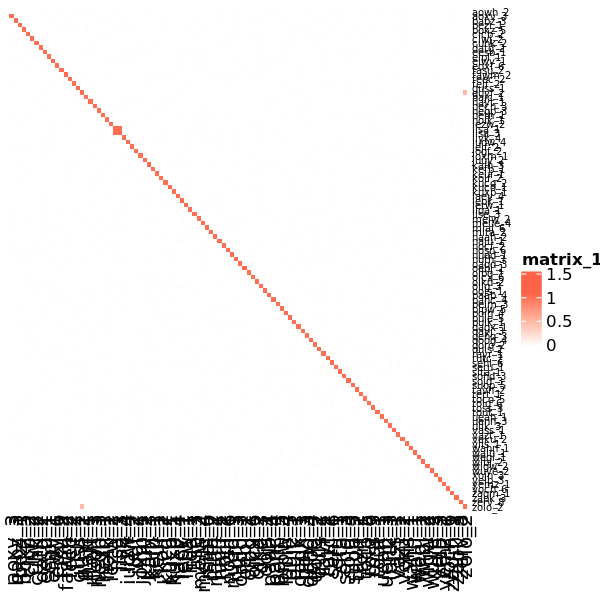

In [8]:
options(repr.plot.width=5, repr.plot.height=5)
selected_kinship <- selected_kinship[order(gsub(".*-","",rownames(selected_kinship))),
                                    order(gsub(".*-","",colnames(selected_kinship)))]
matnum <- matrix(as.numeric(unlist(selected_kinship[,-1])), nrow = nrow(selected_kinship), ncol = ncol(selected_kinship)-1)
rownames(matnum) <- gsub(".*-","",rownames(selected_kinship))
colnames(matnum) <- gsub(".*-","",colnames(selected_kinship)[-1])
m = max(abs(min(matnum)),abs(max(matnum)))
Heatmap(matnum, cluster_rows = F, cluster_columns = F, show_row_dend = F, show_column_dend = F,
        col = colorRamp2(c(0, m), c("white", "tomato")), 
        row_names_gp = gpar(fontsize = 6))

In [84]:
df_repeated_donors = data.frame(donor = names(rowSums(table(sce_0$donor_long_id, sce_0$experiment)>0)[rowSums(table(sce_0$donor_long_id, sce_0$experiment)>0)>1]),
times = as.numeric(rowSums(table(sce_0$donor_long_id, sce_0$experiment)>0)[rowSums(table(sce_0$donor_long_id, sce_0$experiment)>0)>1]))
df_repeated_donors

donor,times
HPSI0114i-vass_1,2
HPSI0114i-zapk_3,2
HPSI0214i-datg_2,2
HPSI0214i-heth_1,2
HPSI0214i-pelm_3,2
HPSI0214i-poih_4,2
HPSI0214i-wibj_2,2
HPSI0413i-nudd_1,2
HPSI0414i-seru_1,2
HPSI0414i-tout_1,2


In [141]:
extra = sum(df_repeated_donors$times-1)

In [142]:
expanded_selected_kinship = matrix(0, nrow=nrow(selected_kinship)+extra, ncol=ncol(selected_kinship)+extra)
nrow(expanded_selected_kinship)
ncol(expanded_selected_kinship)
expanded_selected_kinship[1:5,1:5]

[1] 135

[1] 135

0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


In [143]:
i = 1
for (donor in rownames(selected_kinship)){
    expanded_selected_kinship[i,1:ncol(selected_kinship)] = as.numeric(selected_kinship[donor,])
    expanded_selected_kinship[1:ncol(selected_kinship),i] = as.numeric(selected_kinship[,donor])
    i = i+1
}

In [144]:
rownames(expanded_selected_kinship) = paste0("donor",1:nrow(expanded_selected_kinship))
rownames(expanded_selected_kinship)[1:nrow(selected_kinship)] = rownames(selected_kinship)
colnames(expanded_selected_kinship) = paste0("donor",1:ncol(expanded_selected_kinship))
colnames(expanded_selected_kinship)[1:ncol(selected_kinship)] = colnames(selected_kinship)
expanded_selected_kinship[1:5,1:5]
expanded_selected_kinship[131:135,131:135]

,HPSI0715i-aowh_2,HPSI0115i-aoxv_3,HPSI1014i-babz_3,HPSI0114i-bezi_1,HPSI0814i-bokz_5
HPSI0715i-aowh_2,0.99827400,0.00193716,-0.004135590,-0.007946600,0.00147344
HPSI0115i-aoxv_3,0.00193716,0.98713200,-0.001106870,0.004157040,-0.00617822
HPSI1014i-babz_3,-0.00413559,-0.00110687,0.994439000,-0.000924076,-0.00255380
HPSI0114i-bezi_1,-0.00794660,0.00415704,-0.000924076,0.997594000,0.00636367
HPSI0814i-bokz_5,0.00147344,-0.00617822,-0.002553800,0.006363670,1.00187000


,donor131,donor132,donor133,donor134,donor135
donor131,0,0,0,0,0
donor132,0,0,0,0,0
donor133,0,0,0,0,0
donor134,0,0,0,0,0
donor135,0,0,0,0,0


In [145]:
i

[1] 112

In [146]:
k = 0
for (donor in df_repeated_donors$donor){
    n_rows = df_repeated_donors[df_repeated_donors$donor == donor,"times"]-1
    for (j in 1:n_rows){
        expanded_selected_kinship[i,1:(ncol(selected_kinship)+k)] = as.numeric(expanded_selected_kinship[donor,1:(ncol(selected_kinship)+k)])
        expanded_selected_kinship[1:(nrow(selected_kinship)+k),i] = as.numeric(expanded_selected_kinship[1:(nrow(selected_kinship)+k),donor])
        expanded_selected_kinship[i,i] = 1
        rownames(expanded_selected_kinship)[i] = donor
        colnames(expanded_selected_kinship)[i] = donor
        i = i+1
        k = k+1
    }
}

In [147]:
expanded_selected_kinship[1:5,1:5]

,HPSI0715i-aowh_2,HPSI0115i-aoxv_3,HPSI1014i-babz_3,HPSI0114i-bezi_1,HPSI0814i-bokz_5
HPSI0715i-aowh_2,0.99827400,0.00193716,-0.004135590,-0.007946600,0.00147344
HPSI0115i-aoxv_3,0.00193716,0.98713200,-0.001106870,0.004157040,-0.00617822
HPSI1014i-babz_3,-0.00413559,-0.00110687,0.994439000,-0.000924076,-0.00255380
HPSI0114i-bezi_1,-0.00794660,0.00415704,-0.000924076,0.997594000,0.00636367
HPSI0814i-bokz_5,0.00147344,-0.00617822,-0.002553800,0.006363670,1.00187000


In [148]:
expanded_selected_kinship[131:135,131:135]

,HPSI0813i-guss_1,HPSI0813i-guss_1,HPSI0914i-kajh_3,HPSI1014i-sehl_6,HPSI1113i-wahn_1
HPSI0813i-guss_1,1.000000000,1.007450000,0.00487503,-0.000921947,-0.000744796
HPSI0813i-guss_1,1.007450000,1.000000000,0.00487503,-0.000921947,-0.000744796
HPSI0914i-kajh_3,0.004875030,0.004875030,1.00000000,-0.001536250,-0.005606920
HPSI1014i-sehl_6,-0.000921947,-0.000921947,-0.00153625,1.000000000,-0.003714280
HPSI1113i-wahn_1,-0.000744796,-0.000744796,-0.00560692,-0.003714280,1.000000000


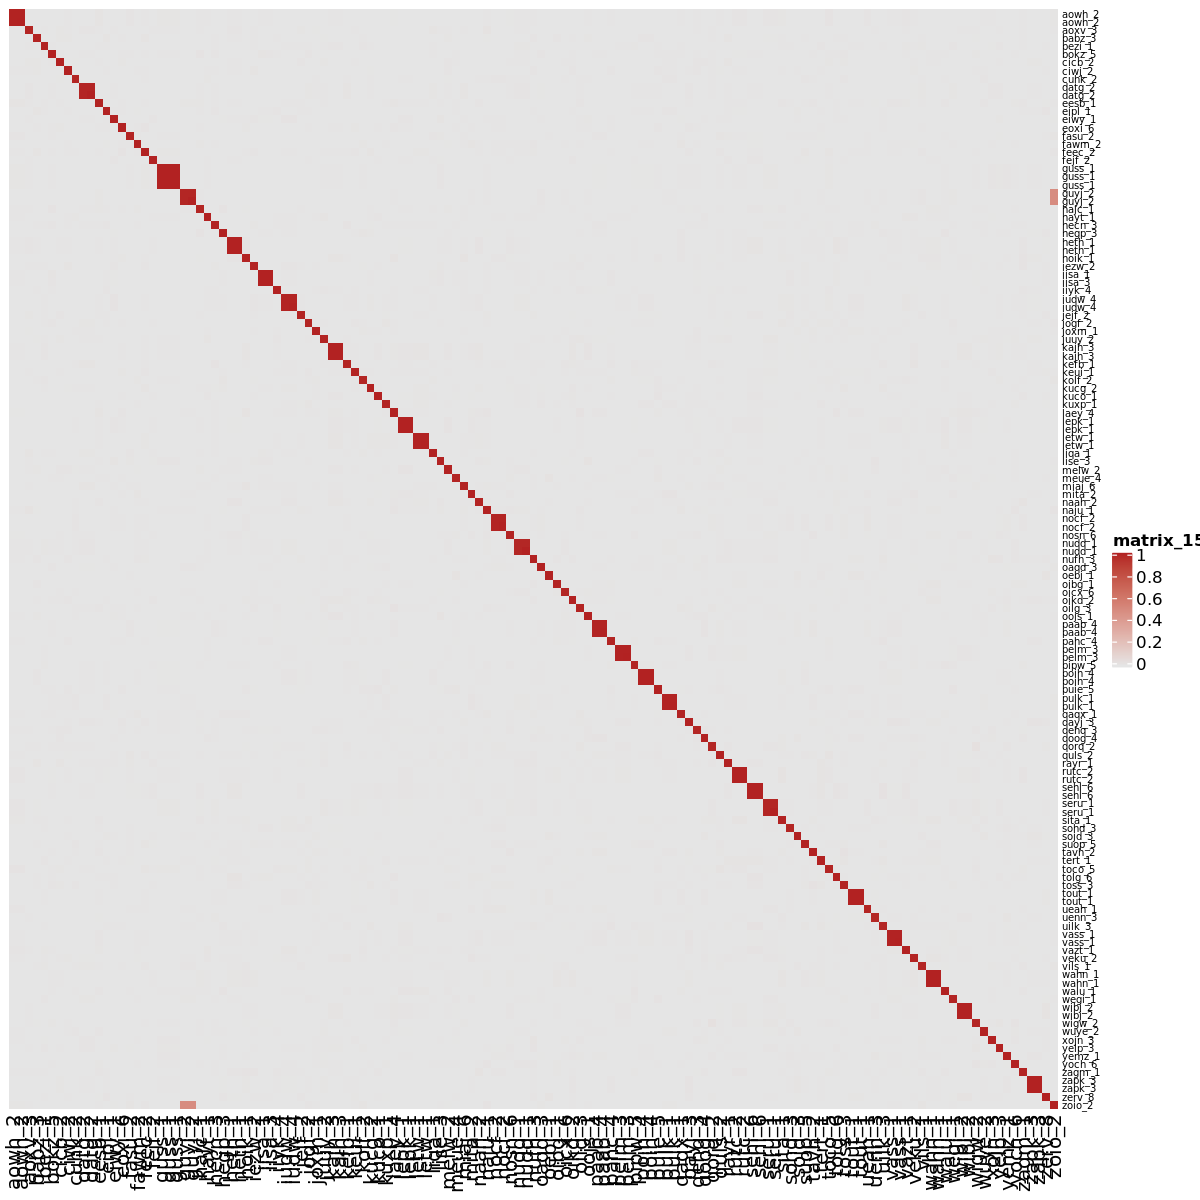

In [149]:
options(repr.plot.width=10, repr.plot.height=10)
expanded_selected_kinship <- expanded_selected_kinship[order(gsub(".*-","",rownames(expanded_selected_kinship))),
                                    order(gsub(".*-","",colnames(expanded_selected_kinship)))]
matnum <- matrix(as.numeric(unlist(expanded_selected_kinship)), nrow = nrow(expanded_selected_kinship), ncol = ncol(expanded_selected_kinship))
rownames(matnum) <- gsub(".*-","",rownames(expanded_selected_kinship))
colnames(matnum) <- gsub(".*-","",colnames(expanded_selected_kinship))
# m = max(abs(min(matnum)),abs(max(matnum)))
Heatmap(matnum, 
        cluster_rows = F, cluster_columns = F, 
        show_row_dend = F, show_column_dend = F,
        col = colorRamp2(c(0, 1), c("gray90", "firebrick")), 
        row_names_gp = gpar(fontsize = 6))

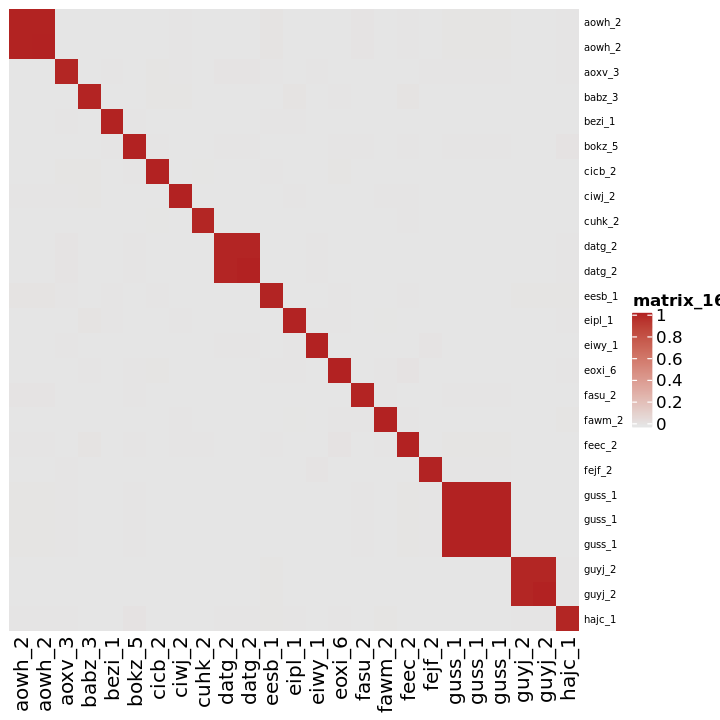

In [150]:
options(repr.plot.width=6, repr.plot.height=6)
expanded_selected_kinship = expanded_selected_kinship[1:25,1:25]
expanded_selected_kinship <- expanded_selected_kinship[order(gsub(".*-","",rownames(expanded_selected_kinship))),
                                    order(gsub(".*-","",colnames(expanded_selected_kinship)))]
matnum <- matrix(as.numeric(unlist(expanded_selected_kinship)), nrow = nrow(expanded_selected_kinship), ncol = ncol(expanded_selected_kinship))
rownames(matnum) <- gsub(".*-","",rownames(expanded_selected_kinship))
colnames(matnum) <- gsub(".*-","",colnames(expanded_selected_kinship))
# m = max(abs(min(matnum)),abs(max(matnum)))
Heatmap(matnum, 
        cluster_rows = F, cluster_columns = F, 
        show_row_dend = F, show_column_dend = F,
        col = colorRamp2(c(0, 1), c("gray90", "firebrick")), 
        row_names_gp = gpar(fontsize = 6))

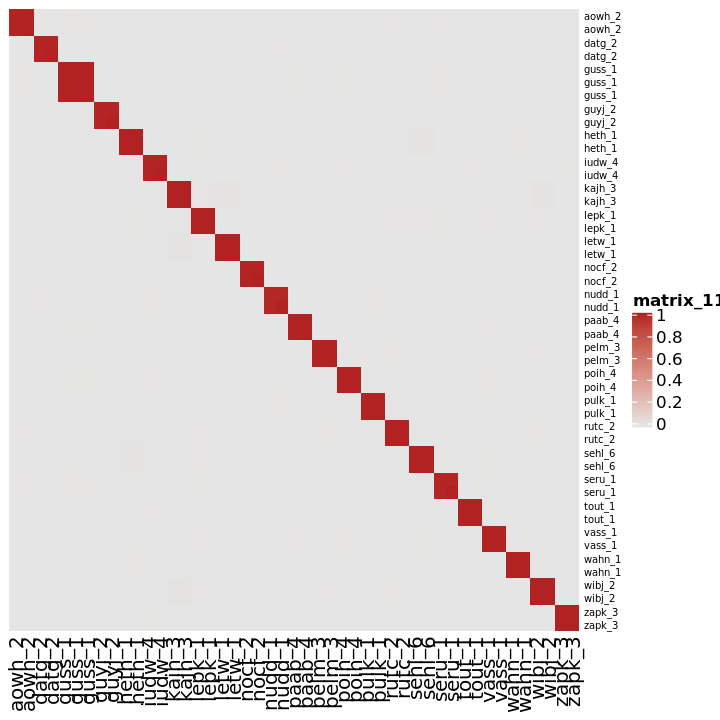

In [129]:
options(repr.plot.width=6, repr.plot.height=6)
expanded_selected_kinship = expanded_selected_kinship[rownames(expanded_selected_kinship) %in% df_repeated_donors$donor,
                         colnames(expanded_selected_kinship) %in% df_repeated_donors$donor]
expanded_selected_kinship <- expanded_selected_kinship[order(gsub(".*-","",rownames(expanded_selected_kinship))),
                                    order(gsub(".*-","",colnames(expanded_selected_kinship)))]
matnum <- matrix(as.numeric(unlist(expanded_selected_kinship)), nrow = nrow(expanded_selected_kinship), ncol = ncol(expanded_selected_kinship))
rownames(matnum) <- gsub(".*-","",rownames(expanded_selected_kinship))
colnames(matnum) <- gsub(".*-","",colnames(expanded_selected_kinship))
# m = max(abs(min(matnum)),abs(max(matnum)))
Heatmap(matnum, 
        cluster_rows = F, cluster_columns = F, 
        show_row_dend = F, show_column_dend = F,
        col = colorRamp2(c(0, 1), c("gray90", "firebrick")), 
        row_names_gp = gpar(fontsize = 6))